<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:2px solid black;">Analyzing User Behavior on Instagram📱🤳</h1>
</center>

![](https://api.backlinko.com/app/uploads/2020/08/instagram-users-post-banner.png)

<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:2px solid black;">Import Library:</h1>
</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:2px solid black;">Import the Dataset:</h1>
</center>

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/user-behavior-on-instagram/comments_cleaned.csv


<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:2px solid black;">Load the Dataset:</h1>
</center>

In [3]:
ins=pd.read_csv("/kaggle/input/user-behavior-on-instagram/comments_cleaned.csv")
ins.head(5)

,Unnamed: 0,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,0,1,unde at dolorem,2,1,13-04-2023 08:04,April 14,yes,1
1,1,2,quae ea ducimus,3,1,13-04-2023 08:04,April 14,no,2
2,2,3,alias a voluptatum,5,1,13-04-2023 08:04,April 14,no,4
3,3,4,facere suscipit sunt,14,1,13-04-2023 08:04,April 14,yes,2
4,4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,April 14,yes,1


<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:2px solid black;">Initial Data Inspection:</h1>
</center>

In [4]:
ins.head()

,Unnamed: 0,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,0,1,unde at dolorem,2,1,13-04-2023 08:04,April 14,yes,1
1,1,2,quae ea ducimus,3,1,13-04-2023 08:04,April 14,no,2
2,2,3,alias a voluptatum,5,1,13-04-2023 08:04,April 14,no,4
3,3,4,facere suscipit sunt,14,1,13-04-2023 08:04,April 14,yes,2
4,4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,April 14,yes,1


In [5]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           7488 non-null   int64 
 1   id                   7488 non-null   int64 
 2   comment              7488 non-null   object
 3   User  id             7488 non-null   int64 
 4   Photo id             7488 non-null   int64 
 5   created Timestamp    7488 non-null   object
 6   posted date          7488 non-null   object
 7   emoji used           7488 non-null   object
 8   Hashtags used count  7488 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 526.6+ KB


In [6]:
ins.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,7488.0,3743.500000,2161.743741,0.0,1871.75,3743.5,5615.25,7487.0
id,7488.0,3744.500000,2161.743741,1.0,1872.75,3744.5,5616.25,7488.0
User id,7488.0,48.949386,28.354045,2.0,24.00,48.0,72.00,100.0
Photo id,7488.0,129.099225,73.776439,1.0,65.00,130.0,193.00,257.0
Hashtags used count,7488.0,2.416667,1.705905,0.0,1.00,2.0,3.25,6.0


# Drop irrelevent column:

In [7]:
columns_to_drop = ["Unnamed: 0", "id"]
ins.drop(columns=columns_to_drop, inplace=True)

<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:2px solid black;">Cleaning on the Data:</h1>
</center>

In [8]:
ins.isnull().sum()

comment                0
User  id               0
Photo id               0
created Timestamp      0
posted date            0
emoji used             0
Hashtags used count    0
dtype: int64

<center>
  <h1 style="background-color:purple; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:2px solid black;">Explore Data Distribution:</h1>
</center>


In [9]:
ins.columns

Index(['comment', 'User  id', 'Photo id', 'created Timestamp', 'posted date',
       'emoji used', 'Hashtags used count'],
      dtype='object')

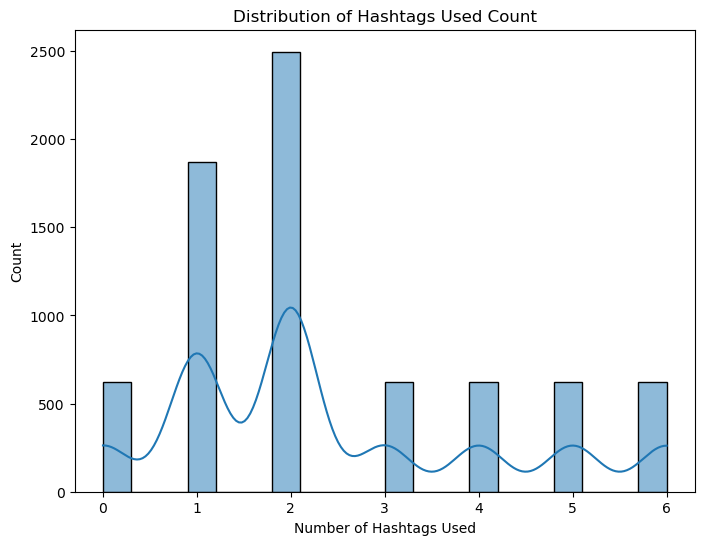

In [10]:
# Plot the distribution of 'Hashtags used count'
plt.figure(figsize=(8, 6))
sns.histplot(ins['Hashtags used count'], bins=20, kde=True)
plt.title('Distribution of Hashtags Used Count')
plt.xlabel('Number of Hashtags Used')
plt.ylabel('Count')
plt.show()

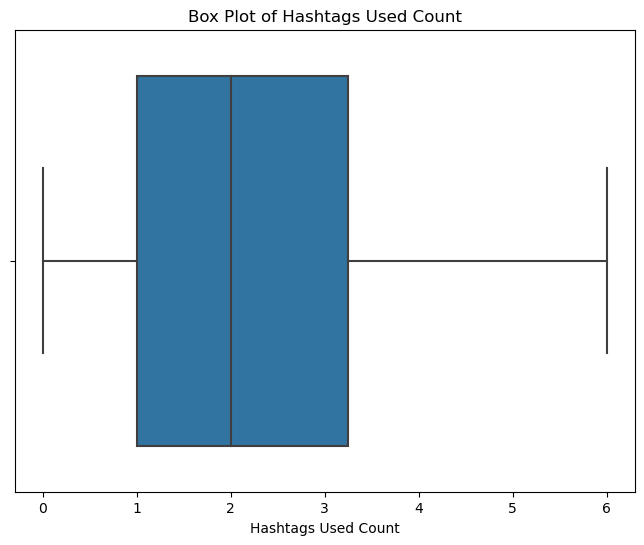

In [11]:
# Box plot to identify any outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=ins['Hashtags used count'])
plt.title('Box Plot of Hashtags Used Count')
plt.xlabel('Hashtags Used Count')
plt.show()

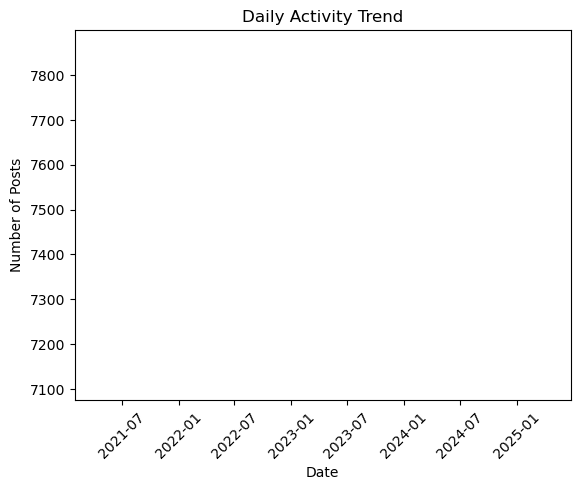

In [12]:
# Convert the timestamp column to datetime type
ins['created Timestamp'] = pd.to_datetime(ins['created Timestamp'])

# Extract date and time components
ins['date'] = ins['created Timestamp'].dt.date
ins['time'] = ins['created Timestamp'].dt.time

# Daily activity trend
daily_activity = ins['date'].value_counts().sort_index()
plt.plot(daily_activity.index, daily_activity.values)
plt.title('Daily Activity Trend')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()
